In [1]:
import numpy as np

import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import os

In [2]:
import healpy as hp

In [3]:
import sys
sys.path.append('../itfgs/')

version = 'cmbonly'

from itfgs.params import SOSehgal as SO

from itfgs.params import SOGaussianOnly as SOg

/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:317: RuntimeWarning: invalid value encountered in divide
  cls[k][ell[idc]] = cols[i + 1][idc] / (w[idc] if not grad_mode else 1.)
/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:323: RuntimeWarning: invalid value encountered in divide
  cls['pp'][ell[idc]] = cols[5][idc] / wpp(ell[idc])
/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:324: RuntimeWarning: invalid value encountered in divide
  cls['pt'][ell[idc]] = cols[6][idc] / wptpe(ell[idc])
/global/homes/o/omard/.conda/envs/lenscarf/lib/python3.8/site-packages/plancklens/utils.py:325: RuntimeWarning: invalid value encountered in divide
  cls['pe'][ell[idc]] = cols[7][idc] / wptpe(ell[idc])


## CMB level plots

In [4]:
Simulationsdir = pathlib.Path(os.environ['SCRATCH'])/'SKYSIMS/SEHGALSIMS/'

temperature_file = 'CMB_PS_healpix_Nside4096_DeltaT_uK_SimLensCMB.txt'

temperature_el, temperature_cl = np.loadtxt(Simulationsdir/temperature_file, unpack = True)

In [5]:
tlm_map = SO.sims_cmb_len.get_sim_tlm(0)

tlm_map_g = SOg.sims_cmb_len.get_sim_tlm(0)

In [6]:
cls_len = SO.cls_len
tt = cls_len['tt']

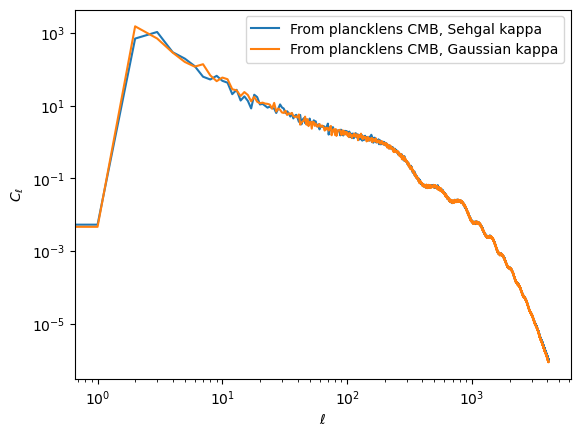

In [12]:
plt.loglog(hp.alm2cl(tlm_map), label = 'From plancklens CMB, Sehgal kappa')
plt.loglog(hp.alm2cl(tlm_map_g), label = 'From plancklens CMB, Gaussian kappa')
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

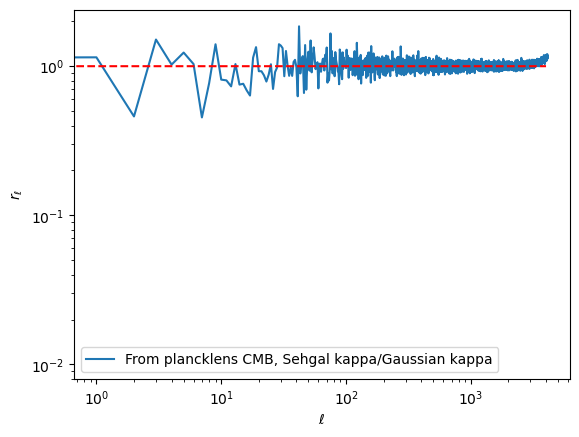

In [26]:
plt.loglog(hp.alm2cl(tlm_map)/hp.alm2cl(tlm_map_g), label = 'From plancklens CMB, Sehgal kappa/Gaussian kappa')
plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
plt.ylabel(r'$r_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

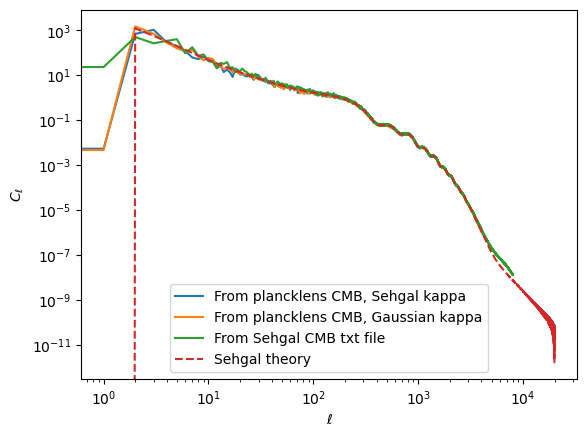

In [13]:
plt.loglog(hp.alm2cl(tlm_map), label = 'From plancklens CMB, Sehgal kappa')
plt.loglog(hp.alm2cl(tlm_map_g), label = 'From plancklens CMB, Gaussian kappa')
plt.loglog(temperature_el, temperature_cl, label = 'From Sehgal CMB txt file')
plt.loglog(tt, label = 'Sehgal theory', ls = '--')
plt.ylabel(r'$C_\ell$')
plt.xlabel(r'$\ell$')
plt.legend()

## Plot QE reconstruction

In [14]:
from plancklens.qcinv.util_alm import alm_copy as palm_copy

In [15]:
plm_map = SO.sims_cmb_len.get_sim_plm(0) #This is the potential map coming from the lensing convergence map

plm_mapg = SOg.sims_cmb_len.get_sim_plm(0) #This is the potential map coming from the lensing convergence map

In [16]:
from lenscarf.iterators import statics

plms = np.load(f'{SO.TEMP}/ptt_sim0000{version}/normalized_phi_plm_it000.npy')

plmsg = np.load(f'{SOg.TEMP}/ptt_sim0000{version}/normalized_phi_plm_it000.npy')

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

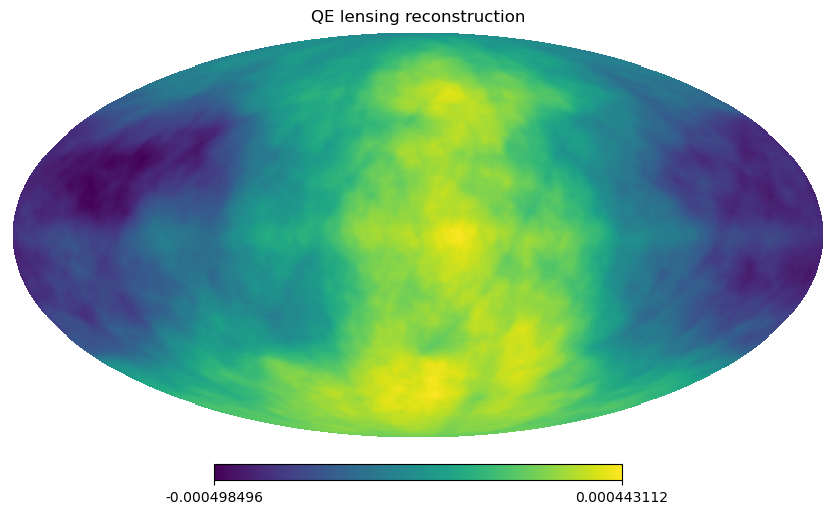

In [17]:
hp.mollview(hp.alm2map(plms, 4096, verbose = False), title = 'QE lensing reconstruction')

In [18]:
plm_in = palm_copy(plm_map, lmax = SO.lmax_phi) #GF input postborn + NL map
auto_in = hp.alm2cl(plm_in)

plm_ing = palm_copy(plm_mapg, lmax = SO.lmax_phi) #GF input postborn + NL map
auto_ing = hp.alm2cl(plm_ing)

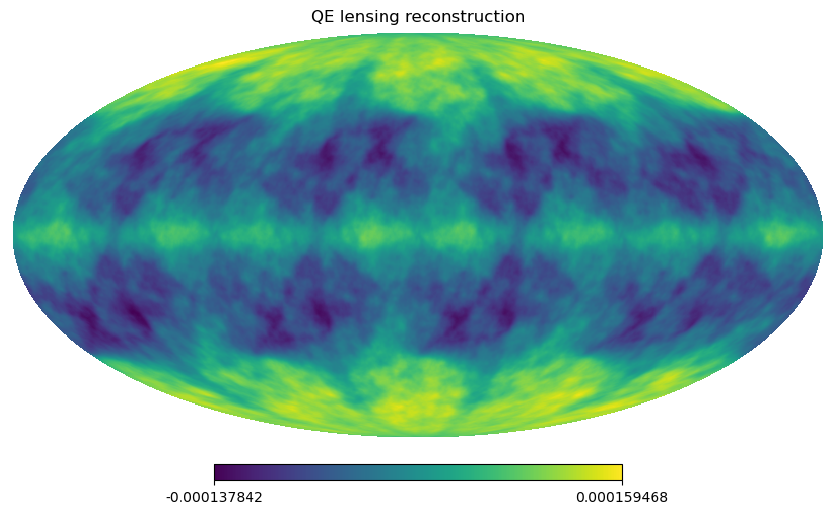

In [19]:
hp.mollview(hp.alm2map(plm_in, 4096, verbose = False), title = 'QE lensing reconstruction')

In [20]:
cross =  hp.alm2cl(plms, plm_in)

crossg =  hp.alm2cl(plmsg, plm_ing)

Text(0, 0.5, '$C_L$')

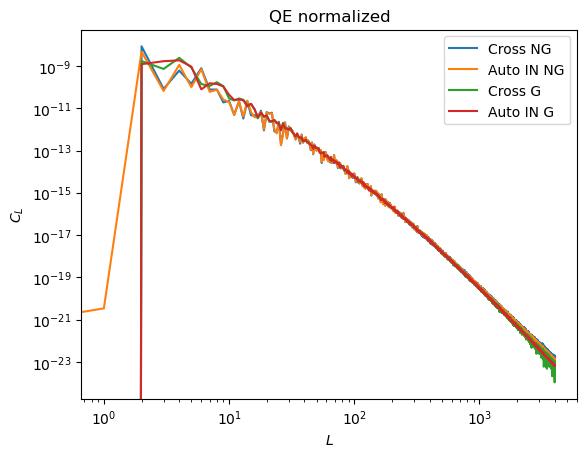

In [24]:
plt.title('QE normalized')
plt.loglog(cross, label = 'Cross NG')
plt.loglog(auto_in, label = 'Auto IN NG')

plt.loglog(crossg, label = 'Cross G')
plt.loglog(auto_ing, label = 'Auto IN G')

plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$C_L$')

In [22]:
auto =  hp.alm2cl(plms, plms)

autog =  hp.alm2cl(plmsg, plmsg)

/tmp/ipykernel_26726/4104139225.py:3: RuntimeWarning: invalid value encountered in divide
  rho = cross/np.sqrt(auto_in*auto)
/tmp/ipykernel_26726/4104139225.py:4: RuntimeWarning: invalid value encountered in divide
  rhog = crossg/np.sqrt(auto_ing*autog)


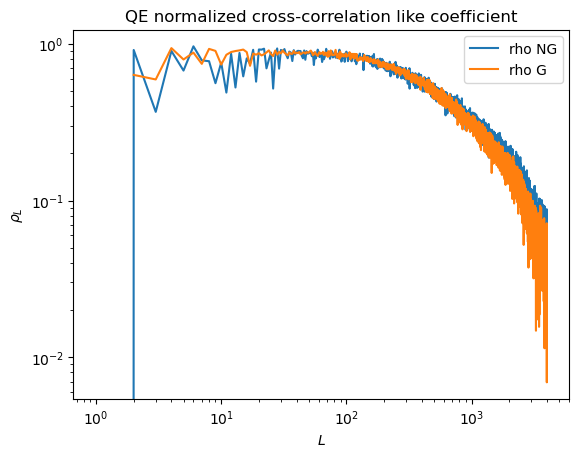

In [23]:
plt.title('QE normalized cross-correlation like coefficient')

rho = cross/np.sqrt(auto_in*auto)
rhog = crossg/np.sqrt(auto_ing*autog)

plt.loglog(rho, label = 'rho NG')
plt.loglog(rhog, label = 'rho G')

plt.xlabel(r'$L$')
plt.ylabel(r'$\rho_L$')

plt.legend()